# 📊 Análisis Exploratorio RGM (Revenue Growth Management)

## Objetivo
Realizar un análisis exploratorio completo de los datos para entender:
- Distribución de ventas, precios y márgenes
- Patrones por segmento de cliente
- Comportamiento de productos (ABC)
- Efectividad de promociones

## Datasets a utilizar:
- `datos_limpios.csv`: Dataset transaccional principal
- `maestro_clientes_rgm.csv`: Segmentación de clientes
- `maestro_productos_rgm.csv`: Portfolio de productos
- `analisis_promociones_rgm.csv`: Datos de promociones

## 1. Importación de Librerías y Configuración

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Librerías cargadas exitosamente")

📊 Librerías cargadas exitosamente


## 2. Carga de Datasets

In [2]:
# Definir rutas de archivos
DATA_PATH = '../data/processed/'

# Cargar datasets
print("🔄 Cargando datasets...")

# Dataset principal (sample por tamaño)
try:
    df_ventas = pd.read_csv(DATA_PATH + 'datos_limpios.csv')
    print(f"✅ Datos limpios: {df_ventas.shape[0]:,} registros")
except:
    print("❌ Error cargando datos_limpios.csv")

# Maestro de clientes
df_clientes = pd.read_csv(DATA_PATH + 'maestro_clientes_rgm.csv')
print(f"✅ Maestro clientes: {df_clientes.shape[0]:,} clientes")

# Maestro de productos
df_productos = pd.read_csv(DATA_PATH + 'maestro_productos_rgm.csv')
print(f"✅ Maestro productos: {df_productos.shape[0]:,} SKUs")

# Análisis de promociones
df_promociones = pd.read_csv(DATA_PATH + 'analisis_promociones_rgm.csv')
print(f"✅ Análisis promociones: {df_promociones.shape[0]:,} promociones")

print("\n🎯 Todos los datasets cargados correctamente")

🔄 Cargando datasets...
✅ Datos limpios: 4,090,711 registros
✅ Maestro clientes: 21,269 clientes
✅ Maestro productos: 1,600 SKUs
✅ Análisis promociones: 2,908 promociones

🎯 Todos los datasets cargados correctamente


## 3. Exploración Inicial - Maestro de Clientes

In [3]:
print("👥 ANÁLISIS DE CLIENTES")
print("=" * 50)

# Información básica
print(f"Total de clientes: {df_clientes.shape[0]:,}")
print(f"Columnas disponibles: {list(df_clientes.columns)}")

# Estadísticas por segmento
print("\n📊 Distribución por Segmento:")
segmento_dist = df_clientes['Segmento'].value_counts().sort_index()
for seg, count in segmento_dist.items():
    pct = (count/len(df_clientes))*100
    print(f"Segmento {seg}: {count:,} clientes ({pct:.1f}%)")

# Mostrar muestra
print("\n📋 Muestra de datos:")
df_clientes.head()

👥 ANÁLISIS DE CLIENTES
Total de clientes: 21,269
Columnas disponibles: ['ID_CLIENTE', 'Venta_Total', 'Ticket_Promedio', 'Num_Compras', 'Cantidad_Total', 'Primera_Compra', 'Ultima_Compra', 'Segmento', 'CLV_Estimado']

📊 Distribución por Segmento:
Segmento A: 1,064 clientes (5.0%)
Segmento B: 3,190 clientes (15.0%)
Segmento C: 6,380 clientes (30.0%)
Segmento D: 10,635 clientes (50.0%)

📋 Muestra de datos:


,ID_CLIENTE,Venta_Total,Ticket_Promedio,Num_Compras,Cantidad_Total,Primera_Compra,Ultima_Compra,Segmento,CLV_Estimado
0,327077,5471471.85,2109.28,2594,1850195.0,20221107,20231215,A,1.367868e+07
1,325151,3744554.31,1235.42,3031,1097719.0,20221101,20231206,A,9.361386e+06
2,317080,3513658.47,469.87,7478,967101.0,20221028,20231226,A,8.784146e+06
3,305057,2866239.12,691.16,4147,1126494.0,20221101,20231227,A,7.165598e+06
4,332453,2659915.94,887.82,2996,51823.0,20221028,20231227,A,6.649790e+06


In [4]:
# Estadísticas descriptivas por segmento
print("💰 ESTADÍSTICAS DE VENTAS POR SEGMENTO")
print("=" * 50)

stats_segmento = df_clientes.groupby('Segmento').agg({
    'Venta_Total': ['count', 'sum', 'mean', 'median'],
    'Ticket_Promedio': ['mean', 'median'],
    'CLV_Estimado': ['mean', 'median'],
    'Num_Compras': ['mean', 'median']
}).round(2)

stats_segmento

💰 ESTADÍSTICAS DE VENTAS POR SEGMENTO


Venta_Total                                    Ticket_Promedio  \
               count           sum       mean    median            mean   
Segmento                                                                  
A               1064  1.507105e+08  141645.22  38840.54          372.87   
B               3190  1.783613e+07    5591.26   4656.72           53.90   
C               6380  8.799869e+06    1379.29   1254.82           15.70   
D              10635  2.380562e+06     223.84    174.25            6.40   

                 CLV_Estimado           Num_Compras         
          median         mean    median        mean median  
Segmento                                                    
A         126.14    354113.06  97101.36      877.99  399.0  
B          17.26     13978.16  11641.80      315.62  292.0  
C           5.90      3448.22   3137.06      226.10  218.0  
D           2.89       559.61    435.62       66.49   47.0

## 4. Exploración de Productos

In [5]:
print("🛍️ ANÁLISIS DE PRODUCTOS")
print("=" * 50)

# Información básica
print(f"Total de SKUs: {df_productos.shape[0]:,}")
print(f"Columnas disponibles: {list(df_productos.columns)}")

# Distribución ABC
print("\n📈 Clasificación ABC:")
abc_dist = df_productos['Clasificacion_ABC'].value_counts()
for clase, count in abc_dist.items():
    pct = (count/len(df_productos))*100
    print(f"Clase {clase}: {count:,} productos ({pct:.1f}%)")

# Estadísticas de precios y márgenes
print("\n💵 Estadísticas de Precios y Márgenes:")
print(f"Precio promedio general: ${df_productos['Precio_Promedio'].mean():.2f}")
print(f"Margen promedio general: {df_productos['Margen_Porcentaje'].mean():.1f}%")
print(f"Venta total del portfolio: ${df_productos['Venta_Total'].sum():,.2f}")

df_productos.head()

🛍️ ANÁLISIS DE PRODUCTOS
Total de SKUs: 1,600
Columnas disponibles: ['SKU', 'Articulo', 'Cantidad_Total', 'Venta_Total', 'Precio_Promedio', 'Costo_Promedio', 'Num_Transacciones', 'Margen_Unitario', 'Margen_Porcentaje', 'Venta_Acumulada', 'Porcentaje_Acumulado', 'Clasificacion_ABC']

📈 Clasificación ABC:
Clase C: 1,222 productos (76.4%)
Clase B: 235 productos (14.7%)
Clase A: 143 productos (8.9%)

💵 Estadísticas de Precios y Márgenes:
Precio promedio general: $104.87
Margen promedio general: -inf%
Venta total del portfolio: $179,727,076.08


,SKU,Articulo,Cantidad_Total,Venta_Total,Precio_Promedio,Costo_Promedio,Num_Transacciones,Margen_Unitario,Margen_Porcentaje,Venta_Acumulada,Porcentaje_Acumulado,Clasificacion_ABC
0,3051185/C22,3051185,1277698.0,10090414.40,48.74,1.50,58973,47.24,96.92,10090414.40,5.61,A
1,5071078/H63,5071078,3847560.0,5931536.53,26.80,1.53,200278,25.27,94.29,16021950.93,8.91,A
2,3051181/C22,3051181,688817.0,5487801.78,52.47,1.56,54678,50.91,97.03,21509752.71,11.97,A
3,3051185/H35,3051185,4833613.0,5477310.05,12.00,1.74,151712,10.26,85.50,26987062.76,15.02,A
4,3071298/F93,3071298,2234294.0,4347909.45,59.97,1.72,116333,58.25,97.13,31334972.21,17.43,A


## 5. Análisis de Promociones

In [6]:
print("🎯 ANÁLISIS DE PROMOCIONES")
print("=" * 50)

# Información básica
print(f"Total de promociones: {df_promociones.shape[0]:,}")
print(f"Columnas disponibles: {list(df_promociones.columns)}")

# Estadísticas generales
total_ventas_promo = df_promociones['Venta_Total'].sum()
total_descuentos = df_promociones['Descuento_Total'].sum()
print(f"\n💰 Ventas totales con promociones: ${total_ventas_promo:,.2f}")
print(f"💸 Descuentos totales otorgados: ${total_descuentos:,.2f}")

# ROI de promociones (filtrar infinitos)
roi_finite = df_promociones[df_promociones['ROI_Promocion'] != np.inf]['ROI_Promocion']
if len(roi_finite) > 0:
    print(f"📊 ROI promedio (finito): {roi_finite.mean():.2f}")
    print(f"📊 ROI mediano (finito): {roi_finite.median():.2f}")

df_promociones.head()

🎯 ANÁLISIS DE PROMOCIONES
Total de promociones: 2,908
Columnas disponibles: ['ID_PROMOCION', 'Venta_Total', 'Ticket_Promedio', 'Num_Transacciones', 'Descuento_Total', 'Cantidad_Total', 'ROI_Promocion']

💰 Ventas totales con promociones: $117,422,780.31
💸 Descuentos totales otorgados: $5,792.69
📊 ROI promedio (finito): 3106.91
📊 ROI mediano (finito): 226.62


,ID_PROMOCION,Venta_Total,Ticket_Promedio,Num_Transacciones,Descuento_Total,Cantidad_Total,ROI_Promocion
0,*AUTO*,11840899.20,166.00,71331,0.0,3764968.0,inf
1,ACH411,17906.40,1279.03,14,0.0,8149.0,inf
2,ACH412,12934.12,587.91,22,0.0,14085.0,inf
3,ACH413,4070.00,2035.00,2,0.0,1020.0,inf
4,ACH414,3746.25,936.56,4,0.0,2264.0,inf


## 6. Visualizaciones Clave

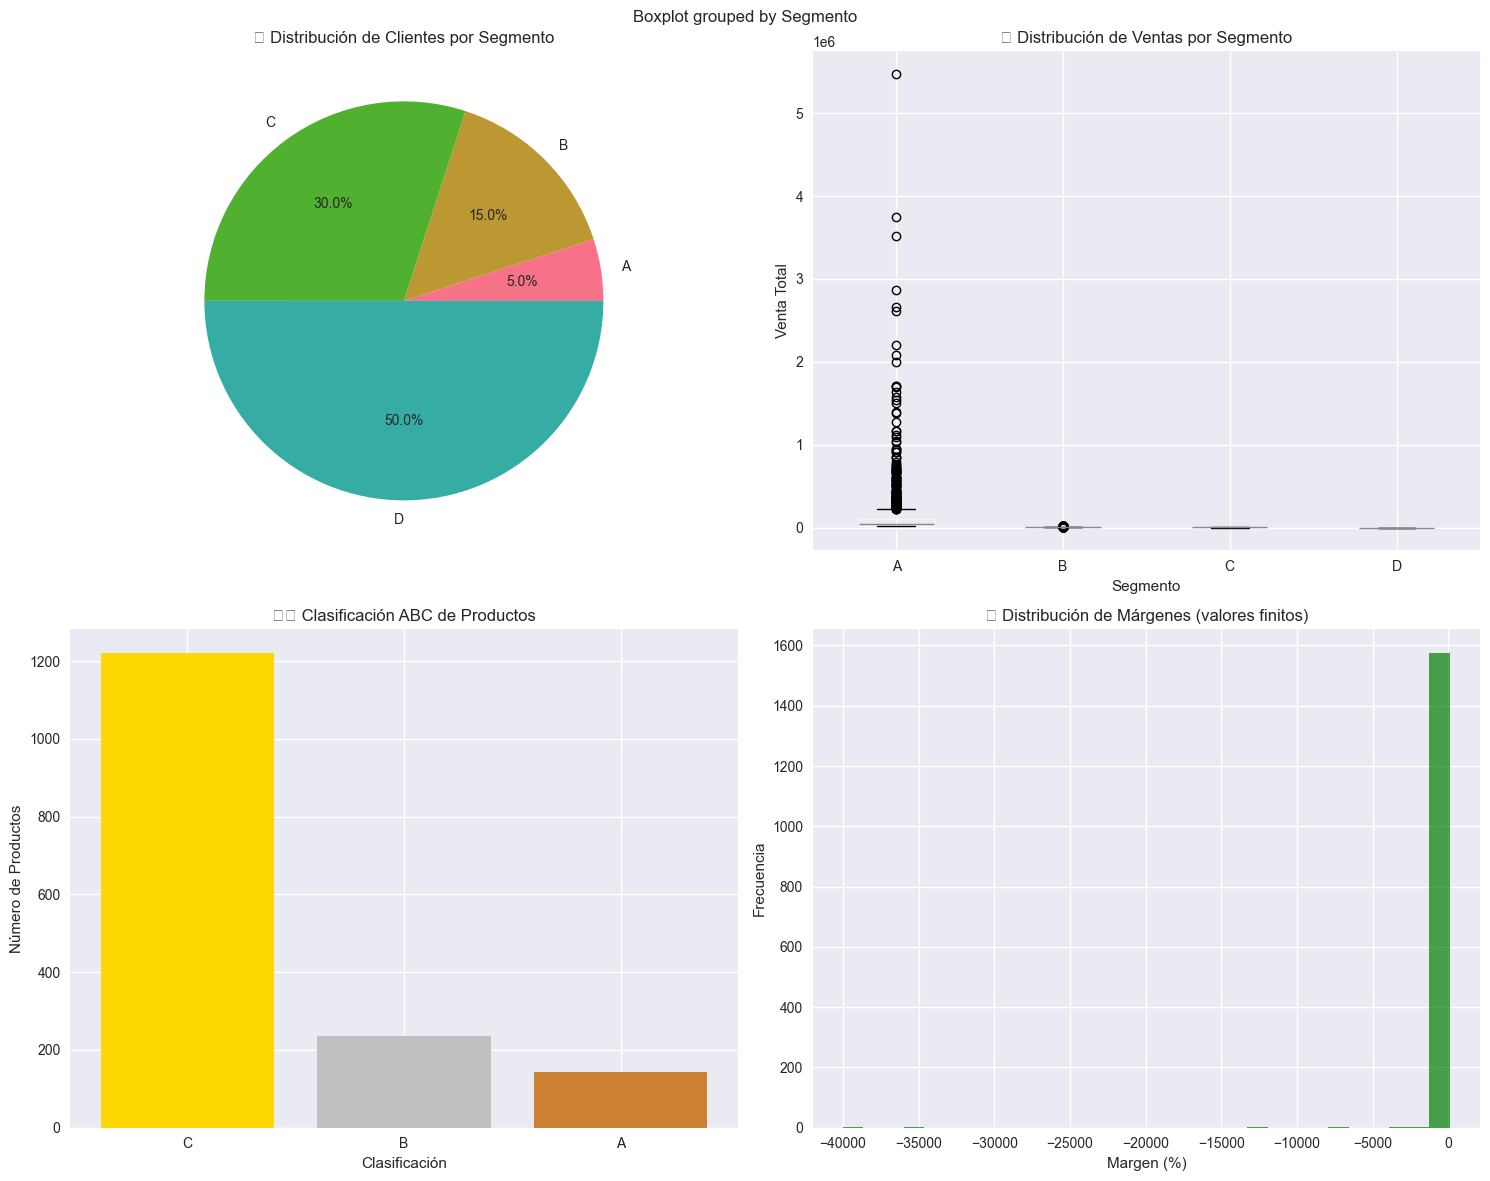

In [8]:
# Configurar subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 Dashboard Exploratorio RGM', fontsize=16, fontweight='bold')

# 1. Distribución de clientes por segmento
segmento_counts = df_clientes['Segmento'].value_counts().sort_index()
axes[0,0].pie(segmento_counts.values, labels=segmento_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('👥 Distribución de Clientes por Segmento')

# 2. Ventas por segmento (boxplot)
df_clientes.boxplot(column='Venta_Total', by='Segmento', ax=axes[0,1])
axes[0,1].set_title('💰 Distribución de Ventas por Segmento')
axes[0,1].set_xlabel('Segmento')
axes[0,1].set_ylabel('Venta Total')

# 3. Clasificación ABC de productos
abc_counts = df_productos['Clasificacion_ABC'].value_counts()
axes[1,0].bar(abc_counts.index, abc_counts.values, color=['gold', 'silver', '#CD7F32'])
axes[1,0].set_title('🛍️ Clasificación ABC de Productos')
axes[1,0].set_xlabel('Clasificación')
axes[1,0].set_ylabel('Número de Productos')

# 4. Distribución de márgenes (filtrar valores infinitos)
margenes_finitos = df_productos['Margen_Porcentaje'][np.isfinite(df_productos['Margen_Porcentaje'])]
axes[1,1].hist(margenes_finitos, bins=30, alpha=0.7, color='green')
axes[1,1].set_title('📈 Distribución de Márgenes (valores finitos)')
axes[1,1].set_xlabel('Margen (%)')
axes[1,1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## 7. Análisis de Correlaciones

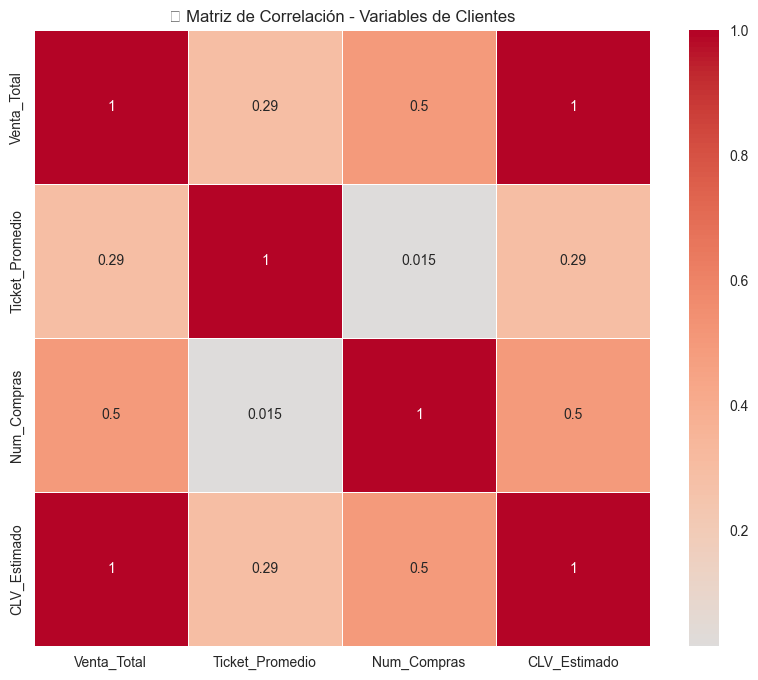

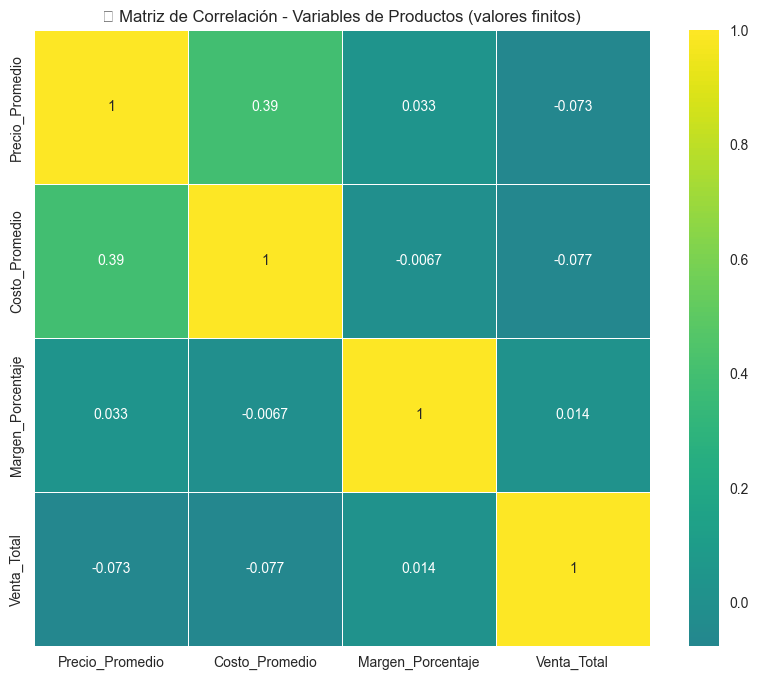

In [9]:
# Matriz de correlación para clientes
numeric_cols_clientes = ['Venta_Total', 'Ticket_Promedio', 'Num_Compras', 'CLV_Estimado']
corr_clientes = df_clientes[numeric_cols_clientes].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_clientes, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('🔗 Matriz de Correlación - Variables de Clientes')
plt.show()

# Matriz de correlación para productos (filtrar valores infinitos)
numeric_cols_productos = ['Precio_Promedio', 'Costo_Promedio', 'Margen_Porcentaje', 'Venta_Total']
df_productos_finite = df_productos[numeric_cols_productos].replace([np.inf, -np.inf], np.nan).dropna()
corr_productos = df_productos_finite.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_productos, annot=True, cmap='viridis', center=0,
            square=True, linewidths=0.5)
plt.title('🔗 Matriz de Correlación - Variables de Productos (valores finitos)')
plt.show()

## 8. Insights Clave y Conclusiones

In [10]:
print("🎯 INSIGHTS CLAVE DEL ANÁLISIS EXPLORATORIO")
print("=" * 60)

# Insights de clientes
seg_a_pct = (df_clientes['Segmento'] == 'A').sum() / len(df_clientes) * 100
seg_a_revenue = df_clientes[df_clientes['Segmento'] == 'A']['Venta_Total'].sum()
total_revenue = df_clientes['Venta_Total'].sum()
seg_a_revenue_pct = (seg_a_revenue / total_revenue) * 100

print(f"👥 CLIENTES:")
print(f"   • Segmento A representa {seg_a_pct:.1f}% de clientes pero {seg_a_revenue_pct:.1f}% de ingresos")
print(f"   • CLV promedio Segmento A: ${df_clientes[df_clientes['Segmento'] == 'A']['CLV_Estimado'].mean():,.0f}")

# Insights de productos
productos_a = (df_productos['Clasificacion_ABC'] == 'A').sum()
productos_a_pct = productos_a / len(df_productos) * 100
ventas_a = df_productos[df_productos['Clasificacion_ABC'] == 'A']['Venta_Total'].sum()
ventas_a_pct = (ventas_a / df_productos['Venta_Total'].sum()) * 100

print(f"\n🛍️ PRODUCTOS:")
print(f"   • Productos clase A: {productos_a} ({productos_a_pct:.1f}%) generan {ventas_a_pct:.1f}% de ventas")
print(f"   • Margen promedio general: {df_productos['Margen_Porcentaje'].mean():.1f}%")
print(f"   • Precio promedio: ${df_productos['Precio_Promedio'].mean():.2f}")

# Insights de promociones
promo_con_roi = df_promociones[df_promociones['ROI_Promocion'] != np.inf]
if len(promo_con_roi) > 0:
    print(f"\n🎯 PROMOCIONES:")
    print(f"   • {len(promo_con_roi)} promociones con ROI calculable")
    print(f"   • ROI promedio: {promo_con_roi['ROI_Promocion'].mean():.2f}")

print("\n" + "=" * 60)
print("✅ Análisis exploratorio completado")
print("📋 Próximos pasos: Análisis de precios y elasticidad")

🎯 INSIGHTS CLAVE DEL ANÁLISIS EXPLORATORIO
👥 CLIENTES:
   • Segmento A representa 5.0% de clientes pero 83.9% de ingresos
   • CLV promedio Segmento A: $354,113

🛍️ PRODUCTOS:
   • Productos clase A: 143 (8.9%) generan 80.0% de ventas
   • Margen promedio general: -inf%
   • Precio promedio: $104.87

🎯 PROMOCIONES:
   • 11 promociones con ROI calculable
   • ROI promedio: 3106.91

✅ Análisis exploratorio completado
📋 Próximos pasos: Análisis de precios y elasticidad


## 9. Exportar Resultados

In [11]:
# Crear resumen ejecutivo
resumen_ejecutivo = {
    'total_clientes': len(df_clientes),
    'total_productos': len(df_productos),
    'total_promociones': len(df_promociones),
    'revenue_total': df_clientes['Venta_Total'].sum(),
    'clv_promedio': df_clientes['CLV_Estimado'].mean(),
    'margen_promedio': df_productos['Margen_Porcentaje'].mean(),
    'precio_promedio': df_productos['Precio_Promedio'].mean()
}

print("💾 Guardando resumen ejecutivo...")
pd.DataFrame([resumen_ejecutivo]).to_csv('../data/processed/resumen_exploratorio_rgm.csv', index=False)
print("✅ Resumen guardado en: ../data/processed/resumen_exploratorio_rgm.csv")

💾 Guardando resumen ejecutivo...
✅ Resumen guardado en: ../data/processed/resumen_exploratorio_rgm.csv
